# Binance

Trade data:
*   Get latest trade rate for each trade timestamp

*   Add the latest trade rates to each timestamps of order data. If no trade on the timestamp, get the latest happened before the timestamp. (We are using Binance_order_array timestamps for this)

In [ ]:
!gdown --id -omitted-

In [2]:
!unzip Crypto.zip

Archive:  Crypto.zip
  inflating: SM-OS Crypto Data/Trade Data/coinbase_trade_array.npy  
  inflating: SM-OS Crypto Data/Trade Data/bitfinex_trade_array.npy  
  inflating: SM-OS Crypto Data/Order Book Data/coinbase_order_array.npy  
  inflating: SM-OS Crypto Data/Trade Data/binance_trade_array.npy  
  inflating: SM-OS Crypto Data/Order Book Data/bitfinex_order_array.npy  
  inflating: SM-OS Crypto Data/Order Book Data/binance_order_array.npy  


In [3]:
import numpy as np
binance_order_arr = np.load('/content/SM-OS Crypto Data/Order Book Data/binance_order_array.npy', allow_pickle=True)
binance_trade_arr = np.load('/content/SM-OS Crypto Data/Trade Data/binance_trade_array.npy', allow_pickle=True)

In [4]:
binance_order_arr

array([{'lastUpdateId': 2041640431, 'bids': [['0.02703200', '3.37300000'], ['0.02702800', '4.00000000'], ['0.02702500', '0.61800000'], ['0.02702400', '5.83200000'], ['0.02702300', '3.11700000'], ['0.02702200', '0.28600000'], ['0.02702100', '3.07500000'], ['0.02701600', '9.71200000'], ['0.02701500', '25.76300000'], ['0.02701400', '3.06800000'], ['0.02700700', '6.50000000'], ['0.02700600', '6.19900000'], ['0.02700500', '3.04000000'], ['0.02700300', '4.40500000'], ['0.02700000', '7.58700000'], ['0.02699800', '0.03800000'], ['0.02699700', '5.41800000'], ['0.02699600', '5.57400000'], ['0.02699200', '9.58000000'], ['0.02698900', '0.01000000'], ['0.02698700', '3.05400000'], ['0.02698600', '2.50000000'], ['0.02698500', '0.22300000'], ['0.02698000', '0.10200000'], ['0.02697900', '7.38700000'], ['0.02697800', '7.38000000'], ['0.02697700', '6.16800000'], ['0.02697600', '2.50000000'], ['0.02697400', '5.95000000'], ['0.02697300', '0.05000000'], ['0.02696800', '27.80800000'], ['0.02696600', '5.55900


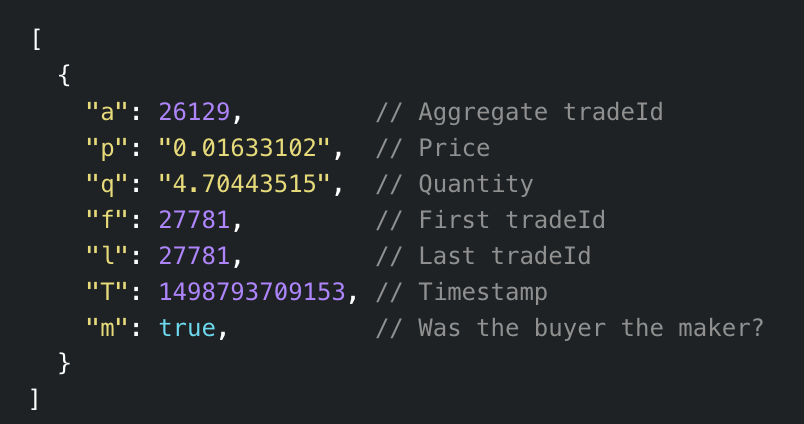


In [5]:
arr_trade=[]
for i in binance_trade_arr:
  if i['m']==True:
    arr_trade.append([i['a'],i['p'],i['q'],i['T'],'sell'])
  elif i['m']==False:
    arr_trade.append([i['a'],i['p'],i['q'],i['T'],'buy'])

In [6]:
import pandas as pd

df_trade = pd.DataFrame(arr_trade,columns=['id', 'price', 'quantity', 'time','type'])

In [7]:
df_trade

,id,price,quantity,time,type
0,186174066,0.02703300,0.16600000,1609195948764,buy
1,186174067,0.02703300,0.11000000,1609195948930,buy
2,186174068,0.02703300,0.11000000,1609195948971,buy
3,186174069,0.02703300,0.05600000,1609195949073,buy
4,186174070,0.02703300,0.02700000,1609195949192,buy
...,...,...,...,...,...
104313,186278379,0.02731500,0.07200000,1609239349260,buy
104314,186278380,0.02731600,0.13500000,1609239349260,buy
104315,186278381,0.02731700,0.07300000,1609239349260,buy
104316,186278382,0.02731800,2.50000000,1609239349260,buy


In [8]:
binance_order_arr
arr_order=[]
for i in binance_order_arr:
    arr_order.append([i['lastUpdateId'],i['bids'],i['asks'],i['time']])


In [9]:
df_order = pd.DataFrame(arr_order,columns=['id', 'bids', 'asks', 'time'])

In [10]:
df_order

,id,bids,asks,time
0,2041640431,"[[0.02703200, 3.37300000], [0.02702800, 4.0000...","[[0.02703300, 1.30900000], [0.02704100, 0.6180...",1609195948717
1,2041640511,"[[0.02703200, 0.22400000], [0.02703100, 0.3550...","[[0.02703300, 6.02000000], [0.02703700, 1.2170...",1609195950271
2,2041640706,"[[0.02703500, 0.24400000], [0.02703400, 0.3880...","[[0.02704600, 2.40800000], [0.02704800, 0.0640...",1609195951836
3,2041640908,"[[0.02704500, 11.22800000], [0.02704400, 0.109...","[[0.02704600, 0.00600000], [0.02704800, 0.0640...",1609195953400
4,2041640982,"[[0.02704500, 5.96600000], [0.02704300, 0.0360...","[[0.02704600, 0.00600000], [0.02704800, 0.0640...",1609195954952
...,...,...,...,...
10047,2044968254,"[[0.02731000, 0.63100000], [0.02730900, 3.1130...","[[0.02731500, 0.35500000], [0.02731800, 4.0590...",1609239317624
10048,2044968898,"[[0.02732000, 7.20000000], [0.02731900, 4.9170...","[[0.02732300, 0.59000000], [0.02732400, 10.000...",1609239325355
10049,2044969434,"[[0.02731700, 3.20000000], [0.02731600, 5.7220...","[[0.02732000, 1.22100000], [0.02732100, 2.4880...",1609239333121
10050,2044970152,"[[0.02731500, 0.00600000], [0.02731300, 0.4130...","[[0.02731600, 3.20000000], [0.02731700, 0.9610...",1609239340850


# Spark

In [11]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [12]:
!pip install findspark

In [13]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.types import StructType
from pyspark.streaming import StreamingContext

In [14]:
spark = SparkSession.builder.getOrCreate()
sc=spark.sparkContext
ssc=StreamingContext(sc,1)
binance_order=ssc.sparkContext.parallelize(arr_order)
binance_trade=ssc.sparkContext.parallelize(arr_trade)

In [15]:
binance_order.take(1)

[[2041640431,
  [['0.02703200', '3.37300000'],
   ['0.02702800', '4.00000000'],
   ['0.02702500', '0.61800000'],
   ['0.02702400', '5.83200000'],
   ['0.02702300', '3.11700000'],
   ['0.02702200', '0.28600000'],
   ['0.02702100', '3.07500000'],
   ['0.02701600', '9.71200000'],
   ['0.02701500', '25.76300000'],
   ['0.02701400', '3.06800000'],
   ['0.02700700', '6.50000000'],
   ['0.02700600', '6.19900000'],
   ['0.02700500', '3.04000000'],
   ['0.02700300', '4.40500000'],
   ['0.02700000', '7.58700000'],
   ['0.02699800', '0.03800000'],
   ['0.02699700', '5.41800000'],
   ['0.02699600', '5.57400000'],
   ['0.02699200', '9.58000000'],
   ['0.02698900', '0.01000000'],
   ['0.02698700', '3.05400000'],
   ['0.02698600', '2.50000000'],
   ['0.02698500', '0.22300000'],
   ['0.02698000', '0.10200000'],
   ['0.02697900', '7.38700000'],
   ['0.02697800', '7.38000000'],
   ['0.02697700', '6.16800000'],
   ['0.02697600', '2.50000000'],
   ['0.02697400', '5.95000000'],
   ['0.02697300', '0.0500000

In [16]:
merge =binance_order.map(lambda x:(str(x[3])[:-3],0)).leftOuterJoin(
    binance_trade.map(lambda x:(str(x[3])[:-3],x[1])))

In [17]:
merge=merge.map(lambda x:[x[0], x[1][1]])

In [18]:
merge=merge.groupByKey().map(lambda x : (x[0], list(x[1])))

In [19]:
merge.take(20)

[('1609195964',
  ['0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02710900',
   '0.02711000',
   '0.02711000']),
 ('1609195968', [None]),
 ('1609195970', ['0.02709600', '0.02709700', '0.02709600']),
 ('1609195987', [None]),
 ('1609195990', ['0.02706300', '0.02706300', '0.02707500', '0.02707600']),
 ('1609195992',
  ['0.02708000', '0.02708100', '0.02708200', '0.02707500', '0.02706800']),
 ('1609195993', [None]),
 ('1609195995', [None]),
 ('1609195996', ['0.02706000', '0.02706500', '0.02706800']),
 ('1609196000',
  ['0.02706500',
   '0.02706000',
   '0.02706000',
   '0.02706000',
   '0.02705900',
   '0.02705700',
   '0.02705600',
   '0.02705500',
   '0.02705600']),
 ('1609196001', ['0.02705100', '0.02705100']),
 ('1609196017',
  ['0.02706400',
   '0.02706400',
   '0.02706500',
   '0.02706400',
   '0.02706500',
   '0.02706700',
   

In [20]:
def replace(partitions):
    last_value = None
    result = []
    for i in partitions:
        if i[1][-1] is None:
            i[1][-1] = last_value
        else:
            last_value = i[1][-1]
        result.append([i[0],i[1][-1]])
    return result 

def arrange(partitions):
    result = []
    for i in range(np.array(partitions).shape[0] - 1):
        partitions[i][1] = partitions[i+1][1]
        result.append([partitions[i][0],partitions[i][1]])
    return result 

In [21]:
final = merge.mapPartitions(replace)

In [22]:
final.take(100)

[['1609195964', '0.02711000'],
 ['1609195968', '0.02711000'],
 ['1609195970', '0.02709600'],
 ['1609195987', '0.02709600'],
 ['1609195990', '0.02707600'],
 ['1609195992', '0.02706800'],
 ['1609195993', '0.02706800'],
 ['1609195995', '0.02706800'],
 ['1609195996', '0.02706800'],
 ['1609196000', '0.02705600'],
 ['1609196001', '0.02705100'],
 ['1609196017', '0.02708300'],
 ['1609196020', '0.02704900'],
 ['1609196021', '0.02704900'],
 ['1609196023', '0.02704900'],
 ['1609196032', '0.02705300'],
 ['1609196037', '0.02705300'],
 ['1609196046', '0.02705100'],
 ['1609196061', '0.02704400'],
 ['1609196069', '0.02705200'],
 ['1609196071', '0.02705200'],
 ['1609196077', '0.02705100'],
 ['1609196082', '0.02705100'],
 ['1609196085', '0.02704700'],
 ['1609196087', '0.02704700'],
 ['1609196088', '0.02704700'],
 ['1609196093', '0.02706600'],
 ['1609196094', '0.02706900'],
 ['1609196096', '0.02706500'],
 ['1609196099', '0.02706500'],
 ['1609196101', '0.02706500'],
 ['1609196102', '0.02706800'],
 ['16091

In [23]:
final = final.mapPartitions(arrange)

In [24]:
final.take(10)

[['1609195964', '0.02711000'],
 ['1609195968', '0.02709600'],
 ['1609195970', '0.02709600'],
 ['1609195987', '0.02707600'],
 ['1609195990', '0.02706800'],
 ['1609195992', '0.02706800'],
 ['1609195993', '0.02706800'],
 ['1609195995', '0.02706800'],
 ['1609195996', '0.02705600'],
 ['1609196000', '0.02705100']]

# influxdb

In [25]:
!pip install influxdb

     |████████████████████████████████| 81kB 4.0MB/s 


In [26]:
!sudo apt-get update && sudo apt-get install influxdb

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [41.5 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hi

In [28]:
!sudo service influxdb start

 * Starting database influxd
   ...done.


In [29]:
from influxdb import InfluxDBClient
client = InfluxDBClient(host='localhost', port=8086)

In [30]:
client.create_database('binance_trade')

In [31]:
client.get_list_database()

[{'name': '_internal'}, {'name': 'binance_trade'}]

In [32]:
def influx_final(partitions):
    result = []
    for i in range(np.array(partitions).shape[0] - 1):
        result.append('binance_trade date='+str(partitions[i][0])+','+'price='+partitions[i][1])
    return result

In [33]:
inf_final=final.mapPartitions(influx_final)

In [34]:
inf_final.collect()[:10]

['binance_trade date=1609195964,price=0.02711000',
 'binance_trade date=1609195968,price=0.02709600',
 'binance_trade date=1609195970,price=0.02709600',
 'binance_trade date=1609195987,price=0.02707600',
 'binance_trade date=1609195990,price=0.02706800',
 'binance_trade date=1609195992,price=0.02706800',
 'binance_trade date=1609195993,price=0.02706800',
 'binance_trade date=1609195995,price=0.02706800',
 'binance_trade date=1609195996,price=0.02705600',
 'binance_trade date=1609196000,price=0.02705100']

In [35]:
client.write_points(inf_final.collect(), database='binance_trade', time_precision='ms', batch_size=1, protocol='line')

True

In [36]:
client.switch_database('binance_trade')

In [37]:
q='select * from binance_trade.autogen.binance_trade'
bin_trade = pd.DataFrame(client.query(q).get_points())

In [38]:
bin_trade[:10]

,time,date,price
0,2021-01-03T13:29:13.417Z,1.609196e+09,0.027110
1,2021-01-03T13:29:13.431Z,1.609196e+09,0.027096
2,2021-01-03T13:29:13.437Z,1.609196e+09,0.027096
3,2021-01-03T13:29:13.444Z,1.609196e+09,0.027076
4,2021-01-03T13:29:13.451Z,1.609196e+09,0.027068
5,2021-01-03T13:29:13.457Z,1.609196e+09,0.027068
6,2021-01-03T13:29:13.464Z,1.609196e+09,0.027068
7,2021-01-03T13:29:13.471Z,1.609196e+09,0.027068
8,2021-01-03T13:29:13.477Z,1.609196e+09,0.027056
9,2021-01-03T13:29:13.484Z,1.609196e+09,0.027051


# Plotly

In [39]:
import plotly.express as px
fig = px.line(bin_trade[:2000], x="date", y="price")
fig.show()